In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import linear_model

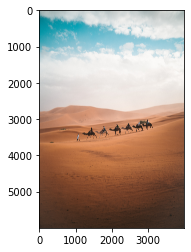

In [3]:
#read image with cv2
#a is the image
a = cv2.imread('./desert.jpg')
#apply the color to the image
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
#display image
plt.imshow(a)
plt.show()

In [4]:
# read the rgb color data sheet 
df = pd.read_csv ('cnm.csv', usecols= ['Name','Red', 'Green', 'Blue'])
print(df)

                   Name  Red  Green  Blue
0         Absolute zero    0     72   186
1            Acid green  176    191    26
2                  Aero  124    185   232
3             Aero blue  201    255   229
4        African violet  178    132   190
...                 ...  ...    ...   ...
1293        Yellow rose  255    240     0
1294    Yellow Sunshine  255    247     0
1295             Zaffre    0     20   168
1296  Zinnwaldite brown   44     22     8
1297               Zomp   57    167   142

[1298 rows x 4 columns]


In [5]:
#use cv2 to get dominant color 
def unique_count_app(a):
    colors, count = np.unique(a.reshape(-1,a.shape[-1]), axis=0, return_counts=True)
    return colors[count.argmax()]

In [6]:
#print dominant color
x = unique_count_app(a)
print(x)

[248 247 245]


In [7]:
r= x[0]
g = x[1]
b= x[2]
n= np.sqrt((r**2)+(g**2) + (b**2))

print(n)

427.244660586882


In [8]:
# linear regression to determine the name of the color
#predict names based on r g and b values
# the color name would be another dependant with the formula nc= m1* r+ m2*g+m3*b +b

alpha=[]

length = len(df.Name)
length

for i in range (0,length):
    alpha = np.append(alpha, i)

df['ind']= alpha

#reg= linear_model.LinearRegression()
#reg.fit(df[['Red (8 bit)','Green (8 bit)','Blue (8 bit)']],df.cname)


# compare r values 
    # if r0 ~ r1 .98
# compare g values
    # if g0 ~ g1 .98
# compare blue values
    # if b0 ~ b1 .98



In [9]:
#linear regression 
# reg= linear_model.LinearRegression()
# reg.fit(df[['Red', 'Green', 'Blue']], df.ind)
# reg.predict([[0, 41, 27]])

# df.Name[607]

# print(df['Red (8 bit)'][599])
# print(df['Green (8 bit)'][599])
# print(df['Blue (8 bit)'][599])
# df.Name[599]
# print(reg.fit(df[['Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)']], df.ind))

In [10]:
 #consider a vector with coordinates red, green and blue to get specific normes and do linear regression 
# calculate the norm 
norm = np.sqrt((df.Red**2)+ (df.Green**2) + (df.Blue**2))
df['norm']=norm
print(df.norm)

0       199.449242
1       261.022987
2       321.597575
3       397.324804
4       291.904094
           ...    
1293    350.178526
1294    355.012676
1295    169.186288
1296     49.839743
1297    226.499448
Name: norm, Length: 1298, dtype: float64


In [11]:
reg= linear_model.LinearRegression()
reg.fit(df[['norm']], df.ind)
p = reg.predict([[n]])
# f_index = int(p)
# print(df.loc[[f_index]]) 

/Users/nadira/yayy/yayy/yay/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
def percentDifference(dominent, other):
    v = (dominent - other) / ((dominent + other)/2)
    return abs(v)

In [13]:
temp= 0 
coef=[]
for i in range(0, len(df.Name)):
    norm_i = df.norm[i]
    coeff= percentDifference(n, norm_i)
    coef.append([coeff, i])

coef.sort()
c = coef[0:5]
for n in range(0, len(c)):
    index = c[n][1]
    print(df.Name[index])

Lavender blush
Bubbles
Seashell
Alice blue
Light cyan


In [14]:
# most_probable_color_index = 0
# most_probable_color_indices = []
# temp= 0
# for i in range(0, len(df.Name)):
#     norm_i = df.norm[i]
#     coef = percentDifference(n, norm_i)
#     if(temp==0):
#         temp=coef
#     if(temp<coef):
#         temp=coef
#         most_probable_color_index = i
# print(df.Name[i])


In [15]:
# most_probable_color_index = 0
# most_probable_color_indices = []
# coef=[]
# temp= None
# for i in range(0, len(df.Name)):
#     #norm_i = df.norm[i]
#     coef.append(percentDifference(n,norm[i]))
# temp= coef[0]
# index = 0
# for z in range(0, len(df.Name)):
#     if (coef[z]<temp):
#         temp= coef[z]
#         index = z
# print(index)
# print (coef[index])
# print(df.Name[index])
